In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mx_dataset.csv')
print(data)

    Males  Females
0      12       11
1       7       10
2       7       11
3      10       10
4       8       11
5      10       12
6      11       12
7       9       10
8       9        9
9      13        9
10      4        9
11      9       10
12     12        8
13     11        7
14      9       12
15      9        9
16      7        7
17     12        8
18     10        9
19     13        8
20     11        7
21     10        7
22      6        9
23     12        9
24     11       12
25      9       10
26     10        9
27     12       13
28      8        9
29      9        9
30     13       10
31     10        9
32      9        6
33      7       12
34     10        8
35      7       11
36     10        8
37      8        8
38     11       11
39     10       12
40     11        9
41      7       10
42     15       11
43      8       14
44      9       12
45      9        7
46     11       11
47     13       10
48     10        9
49     13       11


In [3]:
males_data = data['Males']
females_data = data['Females']

In [4]:
# 2

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(males_data, females_data, equal_var=True)

# Define significance level
alpha = 0.05

if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in mean time spent on cell phones between male and female students."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students."
print(conclusion)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Fail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students.
T-statistic: 0.30394907866566184
P-value: 0.7618111039906375


In [5]:
#3

male_stats = data['Males'].describe()
female_stats = data['Females'].describe()

# Display the statistics
print("Descriptive Statistics for Males:")
print(male_stats)
print("\nDescriptive Statistics for Females:")
print(female_stats)

Descriptive Statistics for Males:
count    50.000000
mean      9.820000
std       2.154161
min       4.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      15.000000
Name: Males, dtype: float64

Descriptive Statistics for Females:
count    50.000000
mean      9.700000
std       1.775686
min       6.000000
25%       9.000000
50%       9.500000
75%      11.000000
max      14.000000
Name: Females, dtype: float64


In [6]:
#4

# Calculate the 95% confidence interval for the population mean of each gender category
male_mean = males_data.mean()
female_mean = females_data.mean()
male_std = males_data.std()
female_std = females_data.std()

n_male = len(males_data)
n_female = len(females_data)

# Using the t-distribution to calculate the confidence intervals
confidence_interval_male = stats.t.interval(0.95, df=n_male-1, loc=male_mean, scale=male_std / (n_male**0.5))
confidence_interval_female = stats.t.interval(0.95, df=n_female-1, loc=female_mean, scale=female_std / (n_female**0.5))

# Calculate the 95% confidence interval for the difference between the means of the two populations
diff_mean = male_mean - female_mean
diff_std = ((male_std**2) / n_male + (female_std**2) / n_female)**0.5

confidence_interval_diff = stats.t.interval(0.95, df=n_male+n_female-2, loc=diff_mean, scale=diff_std)

# Display the confidence intervals
print("95% Confidence Interval for Male Population Mean:", confidence_interval_male)
print("95% Confidence Interval for Female Population Mean:", confidence_interval_female)
print("95% Confidence Interval for the Difference between Means:", confidence_interval_diff)

95% Confidence Interval for Male Population Mean: (9.207794314064703, 10.432205685935298)
95% Confidence Interval for Female Population Mean: (9.19535558679254, 10.20464441320746)
95% Confidence Interval for the Difference between Means: (-0.6634736514965714, 0.9034736514965734)


In [7]:
#6. Assumptions Testing for Two Independent Samples t-test

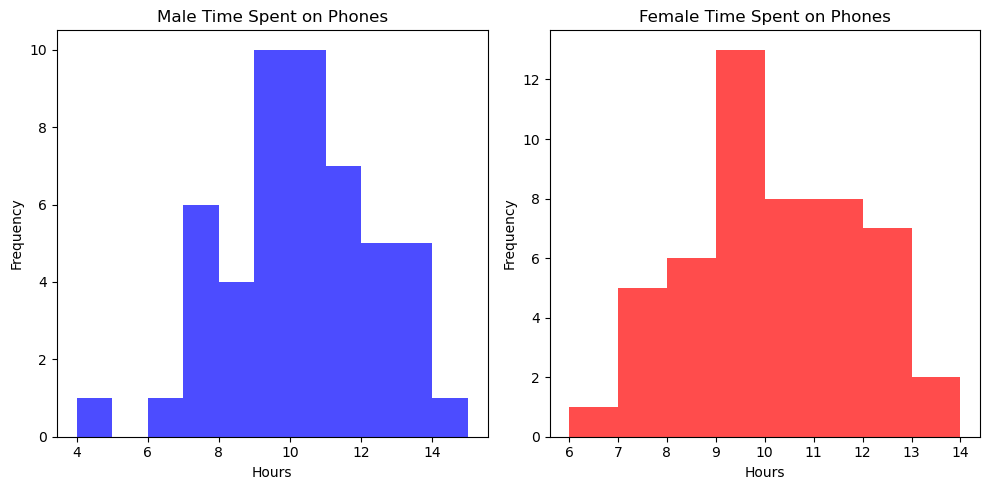

Shapiro-Wilk test for Male data - p-value: 0.35399243235588074
Shapiro-Wilk test for Female data - p-value: 0.12919674813747406


In [10]:
# Visual inspection - histograms// Normality
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(males_data, bins='auto', color='blue', alpha=0.7)
plt.title('Male Time Spent on Phones')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(females_data, bins='auto', color='red', alpha=0.7)
plt.title('Female Time Spent on Phones')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Shapiro-Wilk tests for normality
shapiro_male = stats.shapiro(males_data)
shapiro_female = stats.shapiro(females_data)

print("Shapiro-Wilk test for Male data - p-value:", shapiro_male.pvalue)
print("Shapiro-Wilk test for Female data - p-value:", shapiro_female.pvalue)

In [12]:
# Levene's test for homogeneity of variances
levene_test = stats.levene(males_data, females_data)

print("Levene's test for Homogeneity of Variances - p-value:", levene_test.pvalue)


Levene's test for Homogeneity of Variances - p-value: 0.40671633986363454
